This file is about quick looking at four models: the Logistic Regression(LR), the Support Vector Machines(SVMs), The k-nearest neighbors (KNN), and  the Decision Trees (DT). 

In [25]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#from 1.0_reduceCol.ipynb
%store -r df2_dammy

In [26]:
#make a new datafram by coping <df2_dammy>
df_models = df2_dammy.copy()
print(df_models.shape)
df_models.head(2)

(4608995, 649)


,Date,Arrest,Domestic,Crimes Against,beat_no,Location Description_AIRCRAFT,Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location Description_AIRPORT EXTERIOR - SECURE AREA,...,Community Area_68.0,Community Area_69.0,Community Area_70.0,Community Area_71.0,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0
0,2015-09-05 13:30:00,0,1,Persons,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-09-02 02:00:00,0,1,Persons,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### spread date column to 4 different columns

In [27]:
#https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.year.html
#spreads features of 'Date'
df_models['Year'] = df_models['Date'].dt.year
df_models['Month'] = df_models['Date'].dt.month
df_models['Day'] = df_models['Date'].dt.day
df_models['Hour'] = df_models['Date'].dt.hour
df_models.head(1)

#confirm

,Date,Arrest,Domestic,Crimes Against,beat_no,Location Description_AIRCRAFT,Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location Description_AIRPORT EXTERIOR - SECURE AREA,...,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0,Year,Month,Day,Hour
0,2015-09-05 13:30:00,0,1,Persons,15,0,0,0,0,0,...,0,0,0,0,0,0,2015,9,5,13


In [28]:
#drops the column
df_models.drop(columns='Date', inplace=True)
df_models.head(1)

#confirm

,Arrest,Domestic,Crimes Against,beat_no,Location Description_AIRCRAFT,Location Description_AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,Location Description_AIRPORT BUILDING NON-TERMINAL - SECURE AREA,Location Description_AIRPORT EXTERIOR - NON-SECURE AREA,Location Description_AIRPORT EXTERIOR - SECURE AREA,Location Description_AIRPORT PARKING LOT,...,Community Area_72.0,Community Area_73.0,Community Area_74.0,Community Area_75.0,Community Area_76.0,Community Area_77.0,Year,Month,Day,Hour
0,0,1,Persons,15,0,0,0,0,0,0,...,0,0,0,0,0,0,2015,9,5,13


In [29]:
#check the shape
df_models.shape

(4608995, 652)

#### distribution of `Crimes Against`

In [30]:
#distribution for the column: 'Crimes Against'
df_models['Crimes Against'].value_counts()

Persons     1845640
Society     1623867
Property    1139488
Name: Crimes Against, dtype: int64

<Figure size 640x480 with 0 Axes>

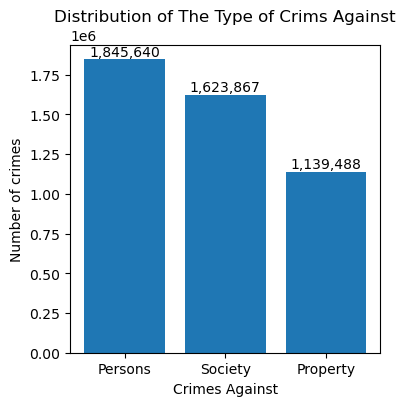

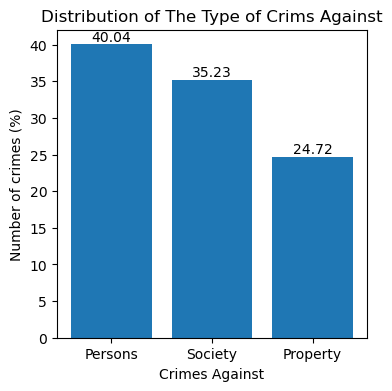

In [31]:
#https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_label_demo.html

#
crimes_Against = df_models['Crimes Against'].value_counts()
percent = crimes_Against/df_models.shape[0]*100

#plot with bar
plt.figure()

#numbers
crims = list(crimes_Against.index)
counts = list(crimes_Against.values)

fig, ax = plt.subplots(figsize = (4,4))
bar_container = ax.bar(crims, counts)
ax.set(xlabel='Crimes Against', ylabel='Number of crimes', title='Distribution of The Type of Crims Against')
ax.bar_label(bar_container, fmt='{:,.0f}')


#percentages
fig, ax = plt.subplots(figsize = (4,4))
bar_container = ax.bar(list(percent.index), list(percent.values))
ax.set(xlabel='Crimes Against', ylabel='Number of crimes (%)', title='Distribution of The Type of Crims Against')
ax.bar_label(bar_container, fmt='{:0.2f}')

plt.show()

#### sampling

Because the size of dataset is big, take some samples from the set for modeling

In [32]:
#https://note.nkmk.me/en/python-pandas-sample/
#https://proclusacademy.com/blog/stratified_sampling_pandas/  <-- Might need
#reduces the sample size
models_sample = df_models.sample(frac=0.01, random_state=1)
#4608995*0.01=~46K

#make a copy for <models_sample> to transfer
df_models_valid = models_sample.copy()
%store df_models_valid

#target
y = pd.factorize(models_sample['Crimes Against'])[0]
# Convert Categorical Attributes to Numerical
#https://www.kaggle.com/code/heng8835/classification-with-ml-predict-crime-type

#features
X = models_sample.drop(columns='Crimes Against')

Stored 'df_models_valid' (DataFrame)


<Figure size 640x480 with 0 Axes>

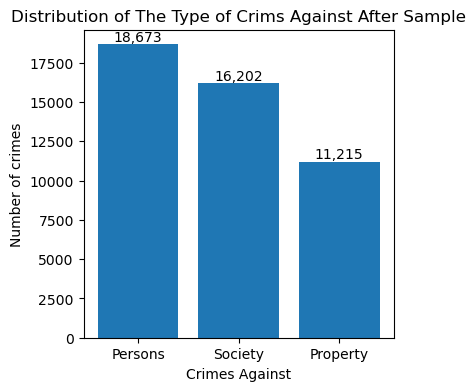

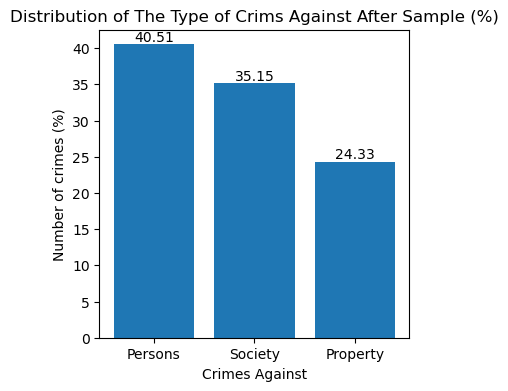

In [33]:
#
crimes_Against = models_sample['Crimes Against'].value_counts()
percent = crimes_Against/models_sample.shape[0]*100

#plot with bar
plt.figure()

#numbers
crims = list(crimes_Against.index)
counts = list(crimes_Against.values)

fig, ax = plt.subplots(figsize = (4,4))
bar_container = ax.bar(crims, counts)
ax.set(xlabel='Crimes Against', ylabel='Number of crimes', title='Distribution of The Type of Crims Against After Sample')
ax.bar_label(bar_container, fmt='{:,.0f}')


#percentages
fig, ax = plt.subplots(figsize = (4,4))
bar_container = ax.bar(list(percent.index), list(percent.values))
ax.set(xlabel='Crimes Against', ylabel='Number of crimes (%)', title='Distribution of The Type of Crims Against After Sample (%)')
ax.bar_label(bar_container, fmt='{:0.2f}')

plt.show()

In [34]:
#check 'y'
y

array([0, 1, 2, ..., 0, 2, 0], dtype=int64)

In [35]:
#make a dataframe for 'y'
y_df = pd.DataFrame(y)
y_df.head()

,0
0,0
1,1
2,2
3,0
4,0


In [36]:
#make a distribution
y_df.value_counts()

#0: Person, 1: Society, and 2: Property

0    18673
1    16202
2    11215
dtype: int64

#### split into train and test

In [37]:
import warnings
warnings.filterwarnings('ignore')

#a function to get accuracies for each models
def split(X, y):

    #split into train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

    #print shapes
    print('shape\n-------------------------------------------')
    print('X_train', X_train.shape, '\tX_test', X_test.shape)
    print('y_train', y_train.shape, '\ty_test', y_test.shape)

    #a scaler
    scaler = StandardScaler()

    #fit it
    scaler.fit(X_train)

    #transform them
    X_train_sca = scaler.transform(X_train)
    X_test_sca = scaler.transform(X_test)

    return X_train_sca, X_test_sca, y_train, y_test

In [38]:
#gets scaled then transforms
X_train, X_test, y_train, y_test = split(X, y)

shape
-------------------------------------------
X_train (34567, 651) 	X_test (11523, 651)
y_train (34567,) 	y_test (11523,)


#### functions for scors, confusion matrix, and reports

In [39]:
#a function to use models
def models(X_train_sca, X_test_sca, y_train, y_test, num):
    #an array for models
    model_type = [LogisticRegression(), LinearSVC(), KNeighborsClassifier(), DecisionTreeClassifier()]

    # import time
    # start_time = time.time()

    #creates a model
    model = model_type[num]
    #fit it
    model.fit(X_train_sca, y_train)
    
    # end_time = time.time()
    # model_time = end_time - start_time

    accu_train = f'{model.score(X_train_sca, y_train):0.3f}'
    accu_test = f'\t{model.score(X_test_sca, y_test):0.3f}'

    return accu_train, accu_test, model

    # print(f'accuracy\t{model_time}\n---------------')
    # print("train: ", f'{model.score(X_train_sca, y_train):0.3f}')
    # print("test: ", f'\t{model.score(X_test_sca, y_test):0.3f}')

In [40]:
from sklearn.metrics import classification_report

#a function for getting results of confusion matrix and a report

def confusionMatrix(modelType, X_test, y_test):
    # Get class predictions
    y_pred = modelType.predict(X_test)

    # Generate confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)

    # label rows and columns
    cf_df = pd.DataFrame(
        cf_matrix, 
        columns=['Predicted Person', 'Predicted Society', 'Predicted Property'],
        index=['Person', 'Society', 'Property']
    )

    display(cf_df)

    # the function expects the estimator, inputs and target as parameters
    ConfusionMatrixDisplay.from_estimator(modelType, X_test, y_test);


    #a report
    report_initial = classification_report(y_test, y_pred)
    print(report_initial)

#### get accuracy scores

In [41]:
##print each accuracy score

print('*** accuracy ***')

model = ['LR', 'SVM', 'KNN', 'DT']
model_Type = []
for i in range(4):
    #print(f'\n\n\t*** {model[i]} ***')
    accu_train, accu_test, modelType = models(X_train, X_test, y_train, y_test, i)
    model_Type.append(modelType)

    print(f'--------------------\n\t[ {model[i]} ]')
    print("train: ", accu_train)
    print("test: ", accu_test)

*** accuracy ***
--------------------
	[ LR ]
train:  0.674
test:  	0.658
--------------------
	[ SVM ]
train:  0.646
test:  	0.626
--------------------
	[ KNN ]
train:  0.692
test:  	0.547
--------------------
	[ DT ]
train:  1.000
test:  	0.592


Results are around 60-70%. LR and SVM: scores for train and test are close. KNN and DT are overfitting. Because of the characteristic of DT, train score is 1.

#### get confusion matrix and a report


	**********  LogisticRegression()  **********


,Predicted Person,Predicted Society,Predicted Property
Person,2927,786,956
Society,708,2720,619
Property,657,215,1935


              precision    recall  f1-score   support

           0       0.68      0.63      0.65      4669
           1       0.73      0.67      0.70      4047
           2       0.55      0.69      0.61      2807

    accuracy                           0.66     11523
   macro avg       0.65      0.66      0.66     11523
weighted avg       0.67      0.66      0.66     11523


	**********  LinearSVC()  **********


,Predicted Person,Predicted Society,Predicted Property
Person,2896,917,856
Society,789,2717,541
Property,895,309,1603


              precision    recall  f1-score   support

           0       0.63      0.62      0.63      4669
           1       0.69      0.67      0.68      4047
           2       0.53      0.57      0.55      2807

    accuracy                           0.63     11523
   macro avg       0.62      0.62      0.62     11523
weighted avg       0.63      0.63      0.63     11523


	**********  KNeighborsClassifier()  **********


,Predicted Person,Predicted Society,Predicted Property
Person,2973,1024,672
Society,1279,2319,449
Property,1180,616,1011


              precision    recall  f1-score   support

           0       0.55      0.64      0.59      4669
           1       0.59      0.57      0.58      4047
           2       0.47      0.36      0.41      2807

    accuracy                           0.55     11523
   macro avg       0.54      0.52      0.53     11523
weighted avg       0.54      0.55      0.54     11523


	**********  DecisionTreeClassifier()  **********


,Predicted Person,Predicted Society,Predicted Property
Person,2856,921,892
Society,955,2521,571
Property,899,464,1444


              precision    recall  f1-score   support

           0       0.61      0.61      0.61      4669
           1       0.65      0.62      0.63      4047
           2       0.50      0.51      0.51      2807

    accuracy                           0.59     11523
   macro avg       0.58      0.58      0.58     11523
weighted avg       0.59      0.59      0.59     11523



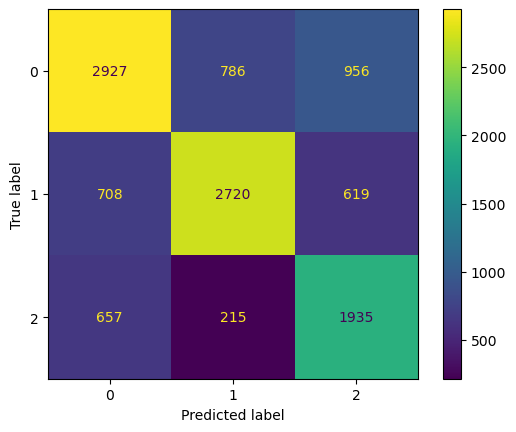

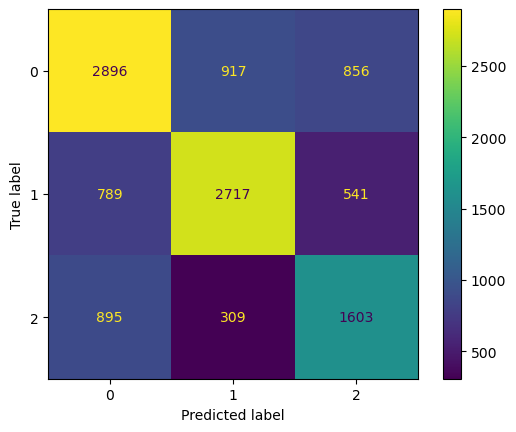

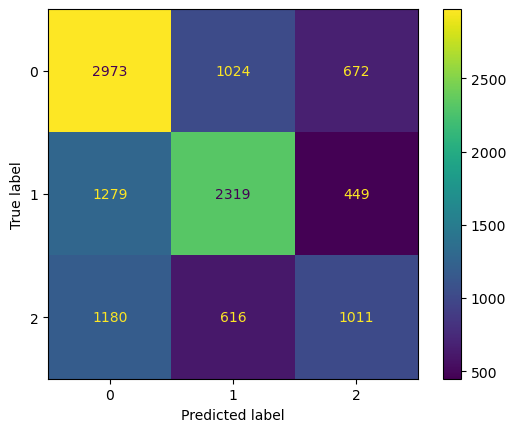

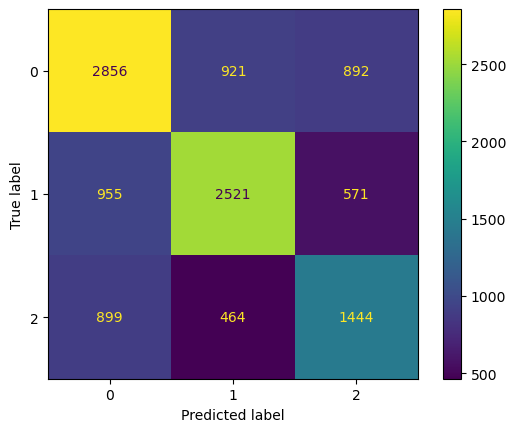

In [43]:
##print each confusion matrix and a report
for i in range(len(model_Type)):
    print('\n\t********** ', model_Type[i], ' **********')
    confusionMatrix(model_Type[i], X_test, y_test)

This is about a quick check. Discussions for the results of confusion matrix and a report will be on the other files for each model. Just for the f1-score, Logistic Regression might be the better model becouse its f-1 score is the highest

---

In [44]:
#<df_models_valid> is transferd in the cell for sampling
#%store df_models_valid

In [45]:
df_models_valid.shape

(46090, 652)